In [1]:
import numpy as np
import json
import pandas as pd
import pickle
import seaborn as sns
from rlberry.agents import Agent
from rlberry.envs import Model
import rlberry.spaces as spaces
from compare_agents import MultipleAgentsComparator


In [23]:
files = ["~/deep_rl_logs/statistical_precipice/atari_100k/DER.json",
         "~/deep_rl_logs/statistical_precipice/atari_100k/OTRainbow.json",
         "~/deep_rl_logs/statistical_precipice/atari_100k/DrQ(eps).json",
         "~/deep_rl_logs/statistical_precipice/atari_100k/SPR.json",]

In [24]:
df_alien = pd.DataFrame()

game = 'Breakout'
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        df_alien[file.split('/')[-1].split('.')[0]] = data[game]


In [25]:
with open( "~/deep_rl_logs/statistical_precipice/atari_100k/CURL/"+game+".json", 'r') as f:
    data = json.load(f)
    data = [ d['eval_average_return'] for d in data]
    df_alien['CURL'] = data

In [ ]:
[array([2, 4]), array([1, 2]), array([0, 2]), array([3, 4]), array([1, 3]), 
 array([0, 3]), array([0, 4])]


<AxesSubplot:>

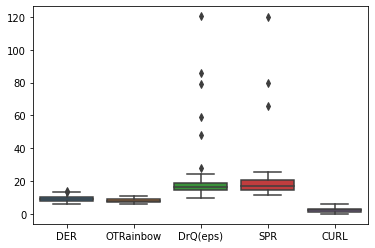

In [26]:
sns.boxplot(df_alien)

In [27]:
n = 5
K = 10

B = 50000
alpha = 0.1

class MyMultipleAgentsComparator(MultipleAgentsComparator):
     def _fit(self, managers, comparisons, Z,  k, seeders, clean_after):
        """
        Redefine how the comparator get the evaluations
        """
        for i in range(len(managers)):
             if i in np.array(comparisons).ravel():
                self.n_iters[i] += self.n
                Z[i] = np.hstack([Z[i], df_alien.values[(k*self.n):((k+1)*self.n), i]])
        return Z

In [32]:
comparator = MyMultipleAgentsComparator(n, K, B, alpha)
comparator.compare([(None, {}) for _ in df_alien.columns],
                   comparisons=np.array([(3,i) for i in [0,1,2,4]]),
                   clean_after = False)

[INFO] 15:17:               agent_name  Stat_val  max_global_step
                            Comparator   107.51         0 


Step 0


[INFO] 15:18:          agent_name  Stat_val  sup_bound  max_global_step
                       Comparator    94.9     120.79          1 


Step 1


[INFO] 15:18:          agent_name  Stat_val  sup_bound  max_global_step
                       Comparator   135.29    132.05          2 


Step 2


[INFO] 15:18:          agent_name  Stat_val  sup_bound  max_global_step
                       Comparator    21.7     139.29          3 


Step 3


[INFO] 15:18:          agent_name  Stat_val  sup_bound  max_global_step
                       Comparator    8.91     190.56          4 


Step 4


[INFO] 15:18:          agent_name  Stat_val  sup_bound  max_global_step
                       Comparator   30.07     201.73          5 


Step 5


[INFO] 15:18:          agent_name  Stat_val  sup_bound  max_global_step
                       Comparator   74.71     208.31          6 


Step 6


[INFO] 15:18:          agent_name  Stat_val  sup_bound  max_global_step
                       Comparator    4.41     268.89          7 


Step 7


[INFO] 15:18:          agent_name  Stat_val  sup_bound  max_global_step
                       Comparator    9.19     325.97          8 


Step 8


[INFO] 15:18:          agent_name  Stat_val  sup_bound  max_global_step
                       Comparator   34.94     328.37          9 


Step 9


array(['reject', 'reject', 'accept', 'reject'], dtype='<U8')

In [33]:
print(comparator.rejected_decision)

[array([3, 4]), array([3, 1]), array([3, 0])]


In [34]:
print(comparator.n_iters)

[20, 20, 50, 50, 10]


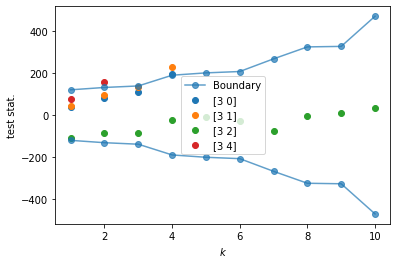

In [35]:
comparator.plot_boundary()